**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
print(dir(fdiry))

 [1] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"                              
 [2] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.ccre_all.bed.gz"                  
 [3] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_astarr.bed.gz"
 [4] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
 [5] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.gencode_v24_tss.bed.gz"           
 [6] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"                       
 [7] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.remap2022_nr.bed.gz"              
 [8] "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"                                                    
 [9] "KS91_K562_hg38_ASTARRseq_Input.count.ccre_all.tsv"                                                   
[10] "KS91_K562_hg38_ASTARRs

In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.remap2022_nr.bed.gz"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_ReMap", "Start_ReMap", "End_ReMap", "Name", "Score", "Strand", 
           "thickStart_ReMap", "thickStop_ReMap", "Reserved",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% 
    mutate(Peak = paste(Chrom, Start, End, sep="_")) %>%
    separate(col = Name, into = c("TF", "Biotype"), sep=":")

### assign
dat_peak_annot_remap = dat
print(dim(dat))
head(dat)

[1] 5520842      15


Chrom,Start,End,Chrom_ReMap,Start_ReMap,End_ReMap,TF,Biotype,Score,Strand,thickStart_ReMap,thickStop_ReMap,Reserved,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,10015,10442,chr1,10016,10229,ZBTB5,K-562,1,.,10108,10109,215958,213,chr1_10015_10442
chr1,136071,137429,chr1,136239,136897,ZBTB33,K-562,1,.,136734,136735,252224252,658,chr1_136071_137429
chr1,136071,137429,chr1,136277,137062,EGR1,K-562,2,.,136757,136758,56224140,785,chr1_136071_137429
chr1,136071,137429,chr1,136281,137167,ZNF639,K-562,1,.,136754,136755,224112112,886,chr1_136071_137429
chr1,136071,137429,chr1,136332,136968,TRIM24,K-562,2,.,136803,136804,25256252,636,chr1_136071_137429
chr1,136071,137429,chr1,136340,137098,NR2C1,K-562,2,.,136788,136789,4125089,758,chr1_136071_137429


In [4]:
###
dat = dat_peak_annot_remap
dat = dat %>% 
    dplyr::select(Peak, TF) %>% 
    dplyr::rename(Name = TF)

dat = dat %>% 
    group_by(Peak, Name) %>% 
    summarize(Count = n(), .groups="drop")

###
dat = dat %>%
    group_by(Peak) %>%
    mutate(Total = sum(Count)) %>%
    mutate(Freq  = Count / Total)

###
dat_peak_count_remap = dat
print(dim(dat))
head(dat)

[1] 4732739       5


Peak,Name,Count,Total,Freq
<chr>,<chr>,<int>,<int>,<dbl>
chr1_100006256_100006880,TAF15,1,1,1.0000000
chr1_10002087_10003910,CBX2,1,6,0.1666667
chr1_10002087_10003910,CBX8,1,6,0.1666667
chr1_10002087_10003910,CEBPB,1,6,0.1666667
chr1_10002087_10003910,ETS1,1,6,0.1666667
chr1_10002087_10003910,HINFP,1,6,0.1666667


In [5]:
print(length(unique(dat_peak_count_remap$Name)))

[1] 413


In [6]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.count.remap2022_nr.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_peak_count_remap, fpath)

In [7]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "peak_regions.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [11]:
peaks = dat_region$Peak
length(peaks)

[1] 417

In [17]:
dat = dat_peak_count_remap %>% 
    #dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak, Name) %>%
    dplyr::mutate(Label = 1) %>%
    tidyr::spread(Name, Label)

dat = left_join(dat_region, dat, by = "Peak")
dat = replace(dat, is.na(dat), 0)

dat_peak_label_remap = dat
print(dim(dat))
head(dat)

[1] 417 418


Chrom,Start,End,Peak,Region,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,⋯,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF79,ZNF83,ZNF830,ZSCAN29,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr8,126782925,126783318,chr8_126782925_126783318,MYC,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr8,126804776,126805825,chr8_126804776_126805825,MYC,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr8,126817018,126817490,chr8_126817018_126817490,MYC,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr8,126820465,126821393,chr8_126820465_126821393,MYC,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr8,126824093,126824987,chr8_126824093_126824987,MYC,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [18]:
TFs = c("SP1", "ELK1", "NRF1", "NFY", "GATA1", "NFE2", "FOS", "JUN", "YY1")
dat = dat_peak_label_remap
dat = dat %>% dplyr::select(Peak, Region, starts_with(TFs))
head(dat)

Peak,Region,SP1,ELK1,NRF1,NFYA,NFYB,GATA1,NFE2,NFE2L1,NFE2L2,FOS,FOSL1,JUN,JUNB,JUND,YY1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8_126778902_126779728,MYC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
chr8_126782925_126783318,MYC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
chr8_126804776_126805825,MYC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
chr8_126817018_126817490,MYC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr8_126820465_126821393,MYC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr8_126824093_126824987,MYC,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1


In [21]:
TFs = c("SP1", "ELK1", "NRF1", "NFY", "GATA1", "NFE2", "FOS", "JUN", "YY1")
dat = dat_peak_label_remap
dat = dat %>% dplyr::select(Peak, Region, starts_with(TFs))
cnames = colnames(dat)

dat = dat %>%
    gather(TF, Label, -Peak, -Region) %>%
    mutate(Label = as.character(Label))
head(dat)

Peak,Region,TF,Label
<chr>,<chr>,<chr>,<chr>
chr8_126778902_126779728,MYC,SP1,0
chr8_126782925_126783318,MYC,SP1,0
chr8_126804776_126805825,MYC,SP1,0
chr8_126817018_126817490,MYC,SP1,0
chr8_126820465_126821393,MYC,SP1,0
chr8_126824093_126824987,MYC,SP1,0


In [22]:
dat %>% dplyr::filter(TF=="ELK1", Label=="1")

Peak,Region,TF,Label
<chr>,<chr>,<chr>,<chr>
chr8_127735036_127736676,MYC,ELK1,1
chr8_127959623_127961065,MYC,ELK1,1
chr8_128427769_128428899,MYC,ELK1,1
chr11_61567108_61567997,FADS,ELK1,1
chr11_61580592_61581826,FADS,ELK1,1
chrX_47816459_47818070,GATA1,ELK1,1
chrX_47836113_47837157,GATA1,ELK1,1
chrX_48539002_48540230,GATA1,ELK1,1
chrX_48573742_48575194,GATA1,ELK1,1


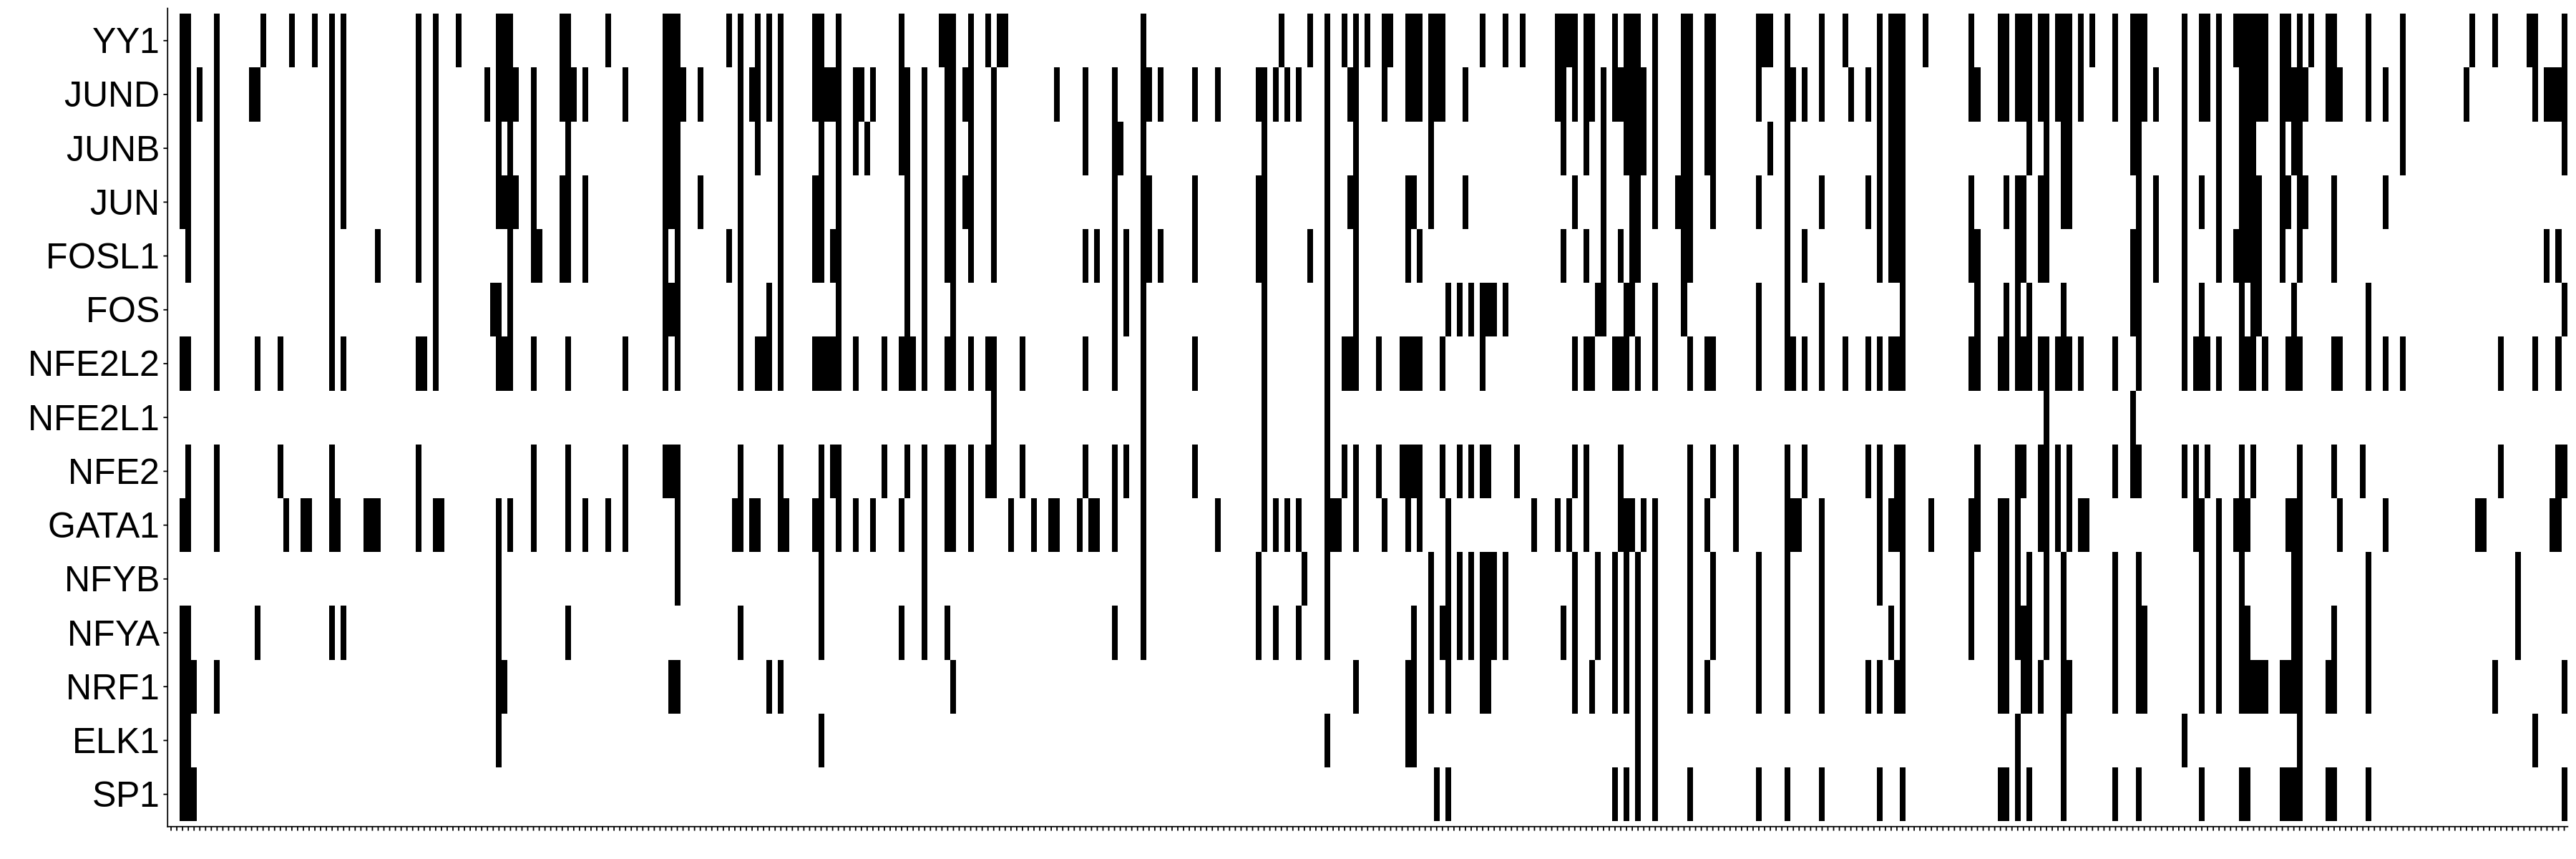

In [20]:
dat$TF = factor(dat$TF, levels=cnames)
gpt = ggplot(dat, aes(x=Peak, y=TF, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=30),
          legend.position = "none")
    

options(repr.plot.height=10, repr.plot.width=30)
print(gpt)